In [3]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore") # Silence warnings
import hvplot.xarray
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geoviews as gv
import holoviews as hv
import numpy as np
#hv.extension('bokeh')

ModuleNotFoundError: No module named 'bokeh.plotting.helpers'

In [2]:
ds = xr.open_dataset("http://basin.ceoe.udel.edu/thredds/dodsC/DEOSRefET.nc")
ds

NameError: name 'xr' is not defined

In [19]:
import matplotlib as mpl
startcolor = '#8B4513'
midcolor = '#FFFFFF'
endcolor = '#008000'
own_cmap1 = mpl.colors.LinearSegmentedColormap.from_list( 'own2', [startcolor, midcolor, endcolor] )


In [15]:
def plot(variable='refET', projection=ccrs.PlateCarree(), width=600, height=540, 
         cmap=own_cmap1,**kwargs):
    
    """Plot filled countour plots for different cartopy projections while using hvplot/holoviews/geoviews"""
    long_name = ds[variable].long_name
    units = ds[variable].units

    spacing = 80 * " "
    title = f'{long_name} {spacing} {units}'
    p = ds.hvplot(groupby='time',x='longitude', y='latitude', z=variable, projection=projection,
                  width=width, height=height, cmap=cmap,
                  legend='bottom', global_extent=False,
                  ylabel=f'{ds.latitude.long_name}[{ds.latitude.units}]', 
                  xlabel=f'{ds.longitude.long_name}[{ds.longitude.units}]'
    ) * gv.feature.coastline
    
    return p

In [24]:
ds.hvplot(groupby='time', width=700, height=1000, x='longitude', y='latitude') * gv.feature.states(projection=ccrs.PlateCarree())

:DynamicMap   [time]
   :Overlay
      .Image.I  :Image   [longitude,latitude]   (refET)
      .States.I :Feature   [Longitude,Latitude]

In [51]:
ds.hvplot(groupby='time', width=700, height=1000, x='longitude', y='latitude', cmap=own_cmap1, vmin=-10, vmax=10)

:DynamicMap   [time]
   :Image   [longitude,latitude]   (refET)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
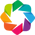

In [39]:
import geoviews as gv
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom

gv.extension('bokeh')

In [40]:
def sample_data():
    """
    Returns a list of latitudes and a list of longitudes (lons, lats)
    for Hurricane Katrina (2005).

    The data was originally sourced from the HURDAT2 dataset from AOML/NOAA:
    http://www.aoml.noaa.gov/hrd/hurdat/newhurdat-all.html on 14th Dec 2012.

    """
    lons = [-75.1, -75.7, -76.2, -76.5, -76.9, -77.7, -78.4, -79.0,
            -79.6, -80.1, -80.3, -81.3, -82.0, -82.6, -83.3, -84.0,
            -84.7, -85.3, -85.9, -86.7, -87.7, -88.6, -89.2, -89.6,
            -89.6, -89.6, -89.6, -89.6, -89.1, -88.6, -88.0, -87.0,
            -85.3, -82.9]

    lats = [23.1, 23.4, 23.8, 24.5, 25.4, 26.0, 26.1, 26.2, 26.2, 26.0,
            25.9, 25.4, 25.1, 24.9, 24.6, 24.4, 24.4, 24.5, 24.8, 25.2,
            25.7, 26.3, 27.2, 28.2, 29.3, 29.5, 30.2, 31.1, 32.6, 34.1,
            35.6, 37.0, 38.6, 40.1]

    return lons, lats

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

lons, lats = sample_data()
track = sgeom.LineString(zip(lons, lats))

title = 'US States which intersect the track of Hurricane Katrina (2005)'

track_buffer = track.buffer(2)
shapes = []
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
    facecolor = (0.9375, 0.9375, 0.859375)

    if state.intersects(track):
        facecolor = 'red'
    elif state.intersects(track_buffer):
        facecolor = '#FF7E00'
    shapes.append(gv.Shape(state).opts(style=dict(fill_color=facecolor)))
shapes.append(gv.Shape(track_buffer).opts(style=dict(alpha=0.5)))
shapes.append(gv.Shape(track))

In [41]:
popts = dict(show_legend=True, apply_ranges=False)
direct_hit = gv.Polygons([[(0,0)]], label='State directly intersects with track').opts(color='red', **popts)
within_2_deg = gv.Polygons([[(0,0)]], label='State is within 2 degrees of track').opts(color='#FF7E00', **popts)

(gv.Overlay(shapes) * direct_hit * within_2_deg).opts(width=700, height=500, infer_projection=True, title=title)

:Overlay
   .Shape.I                                       :Shape   [Longitude,Latitude]
   .Shape.II                                      :Shape   [Longitude,Latitude]
   .Shape.III                                     :Shape   [Longitude,Latitude]
   .Shape.IV                                      :Shape   [Longitude,Latitude]
   .Shape.V                                       :Shape   [Longitude,Latitude]
   .Shape.VI                                      :Shape   [Longitude,Latitude]
   .Shape.VII                                     :Shape   [Longitude,Latitude]
   .Shape.VIII                                    :Shape   [Longitude,Latitude]
   .Shape.IX                                      :Shape   [Longitude,Latitude]
   .Shape.X                                       :Shape   [Longitude,Latitude]
   .Shape.XI                                      :Shape   [Longitude,Latitude]
   .Shape.XII                                     :Shape   [Longitude,Latitude]
   .Shape.XIII                                    :Shape   [Longitude,Latitude]
   .Shape.XIV                                     :Shape   [Longitude,Latitude]
   .Shape.XV                                      :Shape   [Longitude,Latitude]
   .Shape.XVI                                     :Shape   [Longitude,Latitude]
   .Shape.XVII                                    :Shape   [Longitude,Latitude]
   .Shape.XVIII                                   :Shape   [Longitude,Latitude]
   .Shape.XIX                                     :Shape   [Longitude,Latitude]
   .Shape.XX                                      :Shape   [Longitude,Latitude]
   .Shape.XXI                                     :Shape   [Longitude,Latitude]
   .Shape.XXII                                    :Shape   [Longitude,Latitude]
   .Shape.XXIII                                   :Shape   [Longitude,Latitude]
   .Shape.XXIV                                    :Shape   [Longitude,Latitude]
   .Shape.XXV                                     :Shape   [Longitude,Latitude]
   .Shape.XXVI                                    :Shape   [Longitude,Latitude]
   .Shape.XXVII                                   :Shape   [Longitude,Latitude]
   .Shape.XXVIII                                  :Shape   [Longitude,Latitude]
   .Shape.XXIX                                    :Shape   [Longitude,Latitude]
   .Shape.XXX                                     :Shape   [Longitude,Latitude]
   .Shape.XXXI                                    :Shape   [Longitude,Latitude]
   .Shape.XXXII                                   :Shape   [Longitude,Latitude]
   .Shape.XXXIII                                  :Shape   [Longitude,Latitude]
   .Shape.XXXIV                                   :Shape   [Longitude,Latitude]
   .Shape.XXXV                                    :Shape   [Longitude,Latitude]
   .Shape.XXXVI                                   :Shape   [Longitude,Latitude]
   .Shape.XXXVII                                  :Shape   [Longitude,Latitude]
   .Shape.XXXVIII                                 :Shape   [Longitude,Latitude]
   .Shape.XXXIX                                   :Shape   [Longitude,Latitude]
   .Shape.XL                                      :Shape   [Longitude,Latitude]
   .Shape.XLI                                     :Shape   [Longitude,Latitude]
   .Shape.XLII                                    :Shape   [Longitude,Latitude]
   .Shape.XLIII                                   :Shape   [Longitude,Latitude]
   .Shape.XLIV                                    :Shape   [Longitude,Latitude]
   .Shape.XLV                                     :Shape   [Longitude,Latitude]
   .Shape.XLVI                                    :Shape   [Longitude,Latitude]
   .Shape.XLVII                                   :Shape   [Longitude,Latitude]
   .Shape.XLVIII                                  :Shape   [Longitude,Latitude]
   .Shape.XLIX                                    :Shape   [Longitude,Latitude]
   .Shape.L                                       :Shape   [Longitude,L

In [42]:
tiles = gv.tile_sources.EsriImagery
rasm = xr.tutorial.open_dataset('rasm').load()
qmeshes = gv.Dataset(rasm.Tair[::4, ::3, ::3]).to(gv.QuadMesh, groupby='time')

In [43]:
tiles * qmeshes.opts(width=700, height=350)

:HoloMap   [time]
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .QuadMesh.I :QuadMesh   [xc,yc]   (Tair)

In [44]:
rasm = ds.isel(time=1)

In [45]:
qmeshes = gv.Dataset(ds.refET).to(gv.QuadMesh, groupby='time')

In [48]:
tiles * qmeshes.opts(width=700, height=350) * hv.output(max_frames=5000)

TypeError: unsupported operand type(s) for *: 'HoloMap' and 'NoneType'

In [47]:
qmeshes

Animation longer than the max_frames limit 500;
skipping rendering to avoid unexpected lengthy computations.
If desired, the limit can be increased using:
hv.output(max_frames=<insert number>)

:HoloMap   [time]
   :QuadMesh   [longitude,latitude]   (refET)

In [4]:
    dataset = gv.Dataset(ds, ['longitude', 'latitude', 'time'], 'refET', crs=crs.PlateCarree())
    p = dataset.to(gv.Image)

NameError: name 'gv' is not defined

In [5]:
import geoviews as gv

ModuleNotFoundError: No module named 'geoviews'